# FINAL PROJECT 


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
from IPython.display import display

sheet_id = '135h8oaPwMwWcT1XlLkePeH5Kseedua_9'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx"
ecommerce_retail = pd.ExcelFile(url)
ecommerce_retail_df = ecommerce_retail.parse(ecommerce_retail.sheet_names[0])
print("The shape of our dataset is: ", ecommerce_retail_df.shape)

# 10 dòng đầu, 10 dòng cuối của DataFrame
display(ecommerce_retail_df.head(10))
display(ecommerce_retail_df.tail(10))



The shape of our dataset is:  (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
# check data
ecommerce_retail_df.info()
ecommerce_retail_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


###### Data has 541909 rows, 8 columns. Checked and found that CustomerID only has 40629. In addition, the Description column is also missing.
###### UnitPrice is negative. This order quantity may have been returned or canceled.

In [7]:
# Remove rows with null values in the "CustomerID" column
ecommerce_retail_df_cleaned = ecommerce_retail_df.dropna(subset=['CustomerID']).copy()

# Convert column "CustomerID" to int64 data type
ecommerce_retail_df_cleaned['CustomerID'] = ecommerce_retail_df_cleaned['CustomerID'].astype('int64')

# Convert column "InvoiceDate" to datetime data type (if not already done)
ecommerce_retail_df_cleaned['InvoiceDate'] = pd.to_datetime(ecommerce_retail_df_cleaned['InvoiceDate'])

# Check the modified data type againdq
print(ecommerce_retail_df_cleaned.dtypes)

#Check the row and column numbers again after cleaning
print("The shape of our dataset is: ", ecommerce_retail_df_cleaned.shape)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object
The shape of our dataset is:  (406829, 8)


In [8]:
#get canceled transactions
cancelled_orders = ecommerce_retail_df_cleaned[ecommerce_retail_df_cleaned['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom


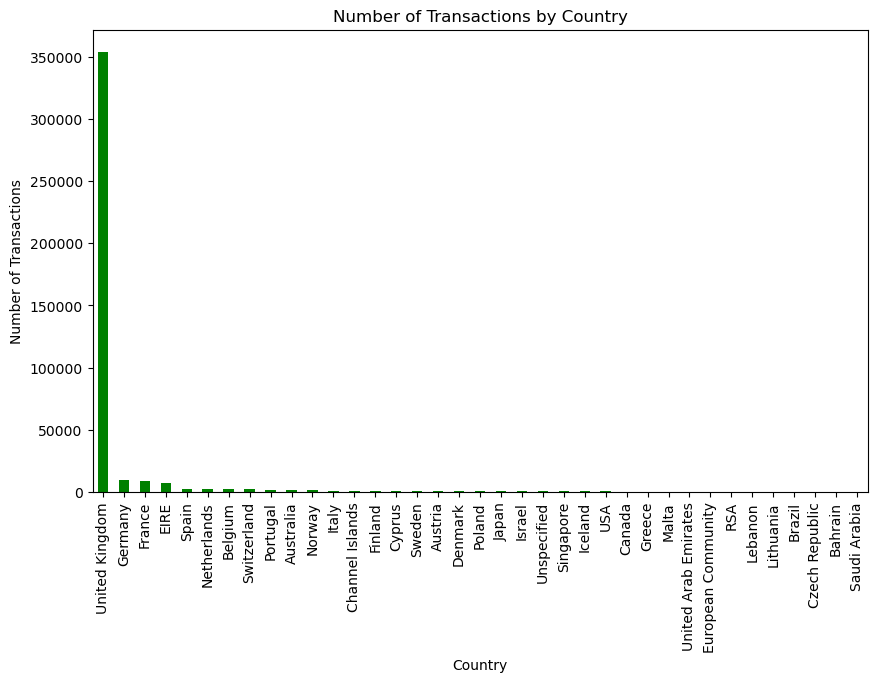

In [9]:
# Filter transactions that have been delivered (not canceled and quantity > 0)
delivered_transactions = ecommerce_retail_df_cleaned[(~ecommerce_retail_df_cleaned['InvoiceNo'].astype(str).str.contains('C')) & (ecommerce_retail_df_cleaned['Quantity'] > 0)]

# Filter transactions with unit price > 0
valid_price_transactions = delivered_transactions[delivered_transactions['UnitPrice'] > 0]

# Count the number of transactions by each country
country_counts = valid_price_transactions['Country'].value_counts()

# Draw a column chart
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='green')
plt.title('Number of Transactions by Country')
plt.xlabel('Country')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


In [10]:
#Customer by country
ecommerce_retail_df_cleaned['Total Cost'] = ecommerce_retail_df_cleaned['Quantity'] * ecommerce_retail_df_cleaned['UnitPrice']
ecommerce_retail_df_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


##### Limits data to UK customers, which accounts for the majority of revenue and transactions

In [11]:
ecommerce_retail_uk = ecommerce_retail_df_cleaned[ecommerce_retail_df_cleaned['Country']=='United Kingdom']
#check the shape
ecommerce_retail_uk.shape

(361878, 9)

In [12]:
#remove canceled orders
ecommerce_retail_uk = ecommerce_retail_uk[ecommerce_retail_uk['Quantity']>0]
ecommerce_retail_uk.shape

(354345, 9)

In [13]:
#remove rows where customerID are NA
ecommerce_retail_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
ecommerce_retail_uk.shape

(354345, 9)

In [14]:
import time, warnings
import datetime as dt
now = dt.date(2011,12,30)
print(now)

2011-12-30


In [15]:
#create a new column called date which contains the date of invoice only
ecommerce_retail_uk['date'] = ecommerce_retail_uk['InvoiceDate'].dt.date
ecommerce_retail_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Cost,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12-01


In [16]:
#group by customers and check last date of purshace
recency_df = ecommerce_retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head()

,CustomerID,LastPurshaceDate
0,12346,2011-01-18
1,12747,2011-12-07
2,12748,2011-12-09
3,12749,2011-12-06
4,12820,2011-12-06


### Recency

In [17]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency_df.head(5)



,CustomerID,LastPurshaceDate,Recency
0,12346,2011-01-18,346
1,12747,2011-12-07,23
2,12748,2011-12-09,21
3,12749,2011-12-06,24
4,12820,2011-12-06,24


### Frequency


In [18]:
# drop duplicates
retail_uk_copy = ecommerce_retail_uk
retail_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346,1
1,12747,11
2,12748,210
3,12749,5
4,12820,4


### Monetary

In [19]:
#create column total cost
monetary_df = ecommerce_retail_uk.groupby(by='CustomerID',as_index=False).agg({'Total Cost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()


,CustomerID,Monetary
0,12346,77183.60
1,12747,689.49
2,12748,3841.31
3,12749,98.35
4,12820,58.20


### create  rfm table 

In [20]:
# Merge recency_df với frequency_df dựa trên CustomerID
temp_df = recency_df.merge(frequency_df, on='CustomerID')

# Merge temp_df với monetary_df dựa trên CustomerID
rfm_df = temp_df.merge(monetary_df, on='CustomerID')

# Kiểm tra kết quả
rfm_df.head()


,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary
0,12346,2011-01-18,346,1,77183.60
1,12747,2011-12-07,23,11,689.49
2,12748,2011-12-09,21,210,3841.31
3,12749,2011-12-06,24,5,98.35
4,12820,2011-12-06,24,4,58.20


In [21]:
#check that the rfm table is correct
(now - dt.date(2011,1,18)).days == 346


True

In [22]:
# quintile
quantiles = rfm_df.quantile(q=[0.2, 0.4, 0.6, 0.8])
quantiles


,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary
0.2,13931.0,2011-06-14,33.0,1.0,15.00
0.4,15047.0,2011-09-29,53.0,2.0,32.45
0.6,16110.0,2011-11-07,92.0,3.0,67.18
0.8,17193.0,2011-11-27,199.0,6.0,160.13


In [23]:
quantiles.to_dict()

{'CustomerID': {0.2: 13931.0, 0.4: 15047.0, 0.6: 16110.0, 0.8: 17193.0},
 'LastPurshaceDate': {0.2: datetime.date(2011, 6, 14),
  0.4: datetime.date(2011, 9, 29),
  0.6: datetime.date(2011, 11, 7),
  0.8: datetime.date(2011, 11, 27)},
 'Recency': {0.2: 33.0, 0.4: 53.0, 0.6: 92.0, 0.8: 199.0},
 'Frequency': {0.2: 1.0, 0.4: 2.0, 0.6: 3.0, 0.8: 6.0},
 'Monetary': {0.2: 15.0, 0.4: 32.45, 0.6: 67.17999999999999, 0.8: 160.13}}

In [24]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quintiles dict)
def RScore(x, p, d):
    if x <= d[p][0.20]:
        return 5
    elif x <= d[p][0.40]:
        return 4
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]: 
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, monetary_value, frequency, d = quintiles dict)
def FMScore(x, p, d):
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]:
        return 3
    elif x <= d[p][0.80]: 
        return 4
    else:
        return 5


In [25]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [26]:
rfm_segmentation.head(20)


,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
0,12346,2011-01-18,346,1,77183.60,1,1,5
1,12747,2011-12-07,23,11,689.49,5,5,5
2,12748,2011-12-09,21,210,3841.31,5,5,5
3,12749,2011-12-06,24,5,98.35,5,4,4
4,12820,2011-12-06,24,4,58.20,5,4,3
5,12821,2011-05-09,235,1,19.92,1,1,2
6,12822,2011-09-30,91,2,30.80,3,2,2
7,12823,2011-09-26,95,5,1759.50,2,4,5
8,12824,2011-10-11,80,1,5.04,3,1,1
9,12826,2011-12-07,23,7,122.80,5,5,4


In [27]:
rfm_segmentation['RFM Score'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head(15)


,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Score
0,12346,2011-01-18,346,1,77183.60,1,1,5,115
1,12747,2011-12-07,23,11,689.49,5,5,5,555
2,12748,2011-12-09,21,210,3841.31,5,5,5,555
3,12749,2011-12-06,24,5,98.35,5,4,4,544
4,12820,2011-12-06,24,4,58.20,5,4,3,543
5,12821,2011-05-09,235,1,19.92,1,1,2,112
6,12822,2011-09-30,91,2,30.80,3,2,2,322
7,12823,2011-09-26,95,5,1759.50,2,4,5,245
8,12824,2011-10-11,80,1,5.04,3,1,1,311
9,12826,2011-12-07,23,7,122.80,5,5,4,554


In [28]:
import pandas as pd
from IPython.display import display

sheet_id = '135h8oaPwMwWcT1XlLkePeH5Kseedua_9'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=xlsx"
ecommerce_retail = pd.ExcelFile(url)
ecommerce_retail_segmentation_df = ecommerce_retail.parse(ecommerce_retail.sheet_names[1])


display(ecommerce_retail_segmentation_df.head(10))


,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425, 4..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214, 215, 115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [29]:
# Split the 'RFM Score' values ​​in ecommerce_retail_segmentation_df into a list and convert to individual rows
ecommerce_retail_segmentation_df['RFM Score'] = ecommerce_retail_segmentation_df['RFM Score'].str.split(', ')
ecommerce_retail_segmentation_df = ecommerce_retail_segmentation_df.explode('RFM Score').reset_index(drop=True)

# Merge two tables based on column 'RFM Score'
merged_df = rfm_segmentation.merge(ecommerce_retail_segmentation_df, on='RFM Score', how='left')

# print()
print("The shape of our merged dataset is: ", merged_df.shape)
display(merged_df.head(30))


The shape of our merged dataset is:  (3921, 10)


,CustomerID,LastPurshaceDate,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Score,Segment
0,12346,2011-01-18,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12747,2011-12-07,23,11,689.49,5,5,5,555,Champions
2,12748,2011-12-09,21,210,3841.31,5,5,5,555,Champions
3,12749,2011-12-06,24,5,98.35,5,4,4,544,Champions
4,12820,2011-12-06,24,4,58.20,5,4,3,543,Loyal
5,12821,2011-05-09,235,1,19.92,1,1,2,112,Lost customers
6,12822,2011-09-30,91,2,30.80,3,2,2,322,Hibernating customers
7,12823,2011-09-26,95,5,1759.50,2,4,5,245,At Risk
8,12824,2011-10-11,80,1,5.04,3,1,1,311,New Customers
9,12826,2011-12-07,23,7,122.80,5,5,4,554,Champions


## Visualizations


In [57]:
#number of customers in each segment 

print("Champions: ", len(merged_df[merged_df['Segment'] == 'Champions']))
print("Loyal: ", len(merged_df[merged_df['Segment'] == 'Loyal']))
print("Potential Loyalist: ", len(merged_df[merged_df['Segment'] == 'Potential Loyalist']))
print("New Customers: ", len(merged_df[merged_df['Segment'] == 'New Customers']))
print("Promising: ", len(merged_df[merged_df['Segment'] == 'Promising']))
print("Need Attention: ", len(merged_df[merged_df['Segment'] == 'Need Attention']))
print("About To Sleep: ", len(merged_df[merged_df['Segment'] == 'About To Sleep']))
print("At Risk: ", len(merged_df[merged_df['Segment'] == 'At Risk']))
print("Cannot Lose Them: ", len(merged_df[merged_df['Segment'] == 'Cannot Lose Them']))
print("Hibernating customers: ", len(merged_df[merged_df['Segment'] == 'Hibernating customers']))
print("Lost customers: ", len(merged_df[merged_df['Segment'] == 'Lost customers']))

Champions:  669
Loyal:  344
Potential Loyalist:  403
New Customers:  386
Promising:  219
Need Attention:  182
About To Sleep:  178
At Risk:  333
Cannot Lose Them:  181
Hibernating customers:  559
Lost customers:  467


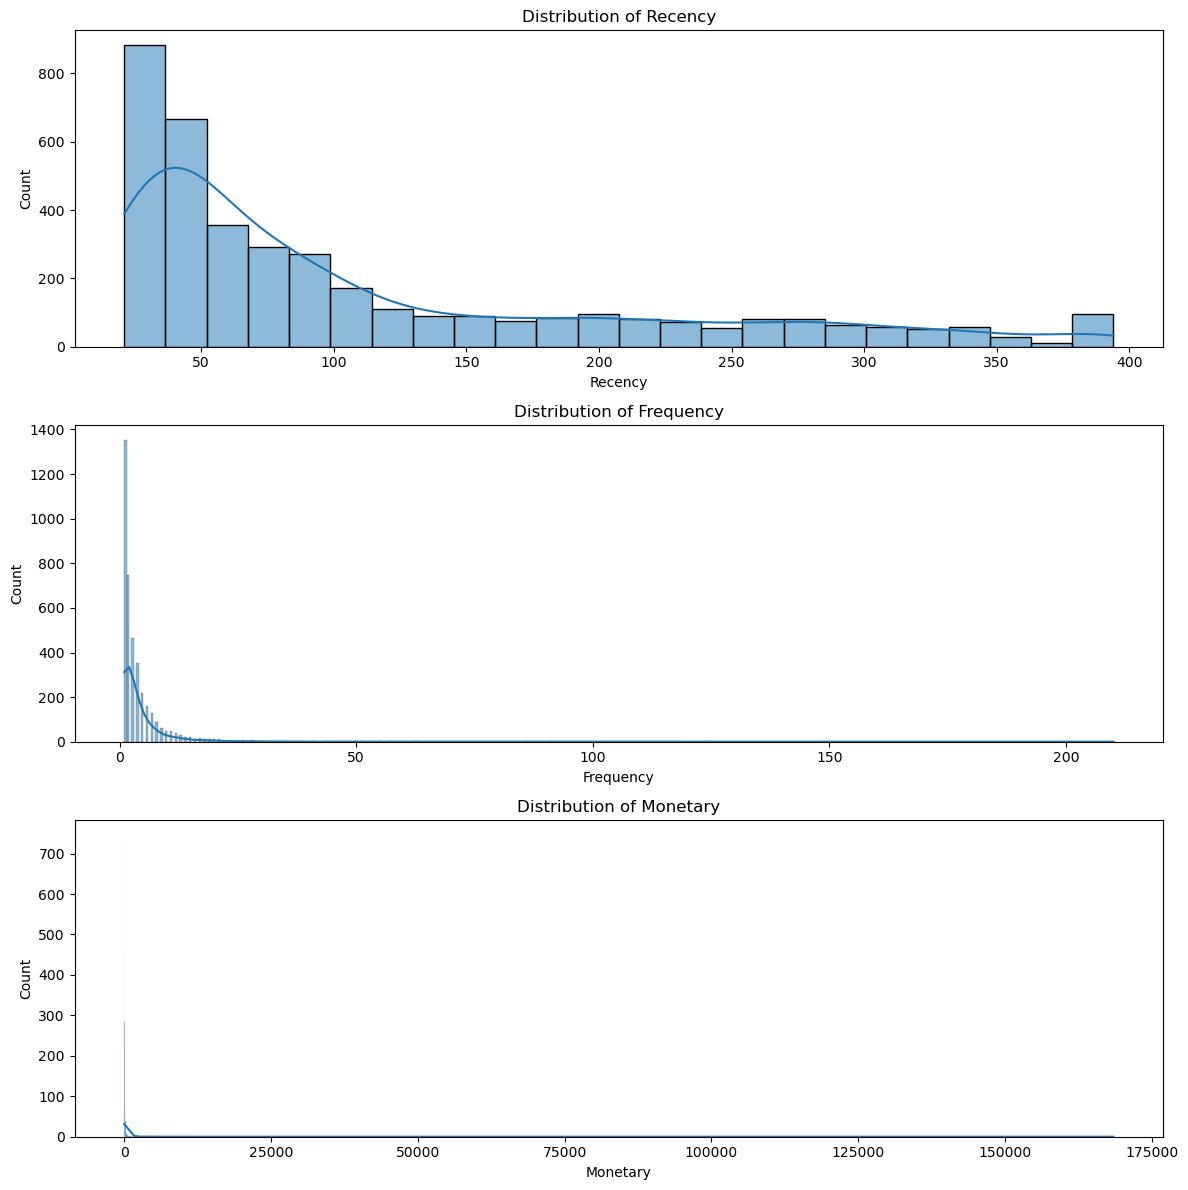

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define variables for analysis
variables = ['Recency', 'Frequency', 'Monetary']

# Create a figure to contain the subplots
fig, axes = plt.subplots(len(variables), 1, figsize=(12, 12))

# Create and display distribution plots for each variable
for i, variable in enumerate(variables):
    ax = axes[i]
    sns.histplot(rfm_segmentation[variable], kde=True, ax=ax)  
    ax.set_title(f"Distribution of {variable}")

# Adjust layout and figure display
plt.tight_layout()
plt.show()


In [45]:
!pip install squarify


  Obtaining dependency information for squarify from https://files.pythonhosted.org/packages/0b/2b/2e77c35326efec19819cd1d729540d4d235e6c2a3f37658288a363a67da5/squarify-0.4.3-py3-none-any.whl.metadata


#### Segment by CustomerID


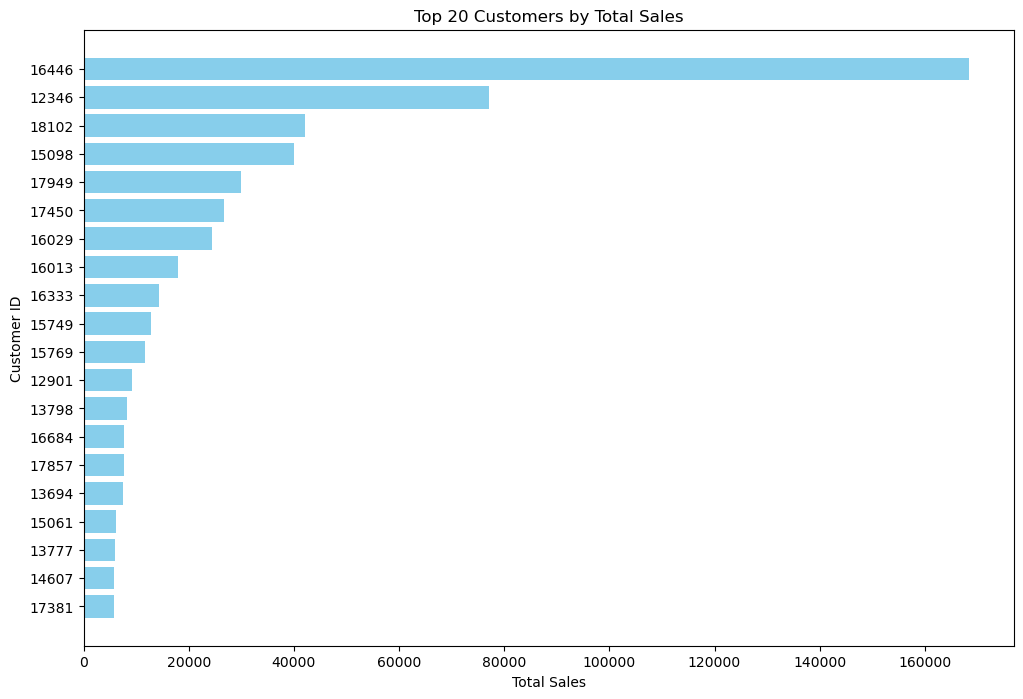

In [53]:

import pandas as pd
import matplotlib.pyplot as plt

# Calculate total revenue for each customer
customer_sales = merged_df.groupby('CustomerID')['Monetary'].sum().reset_index(name='Total_Sales')

# Get the top 20 customers with the highest total revenue
top_customers = customer_sales.sort_values(by='Total_Sales', ascending=False).head(20)

# Bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_customers['CustomerID'].astype(str), top_customers['Total_Sales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Customer ID')
plt.title('Top 20 Customers by Total Sales')
plt.gca().invert_yaxis()  
plt.show()


The shape of our dataset after grouping is:  (11, 3)


,Segment,Total_Sales,Sales_share
0,About To Sleep,3683.14,0.003203
1,At Risk,141197.59,0.122777
2,Cannot Lose Them,106228.53,0.092370
3,Champions,535558.47,0.465691
4,Hibernating customers,15014.40,0.013056


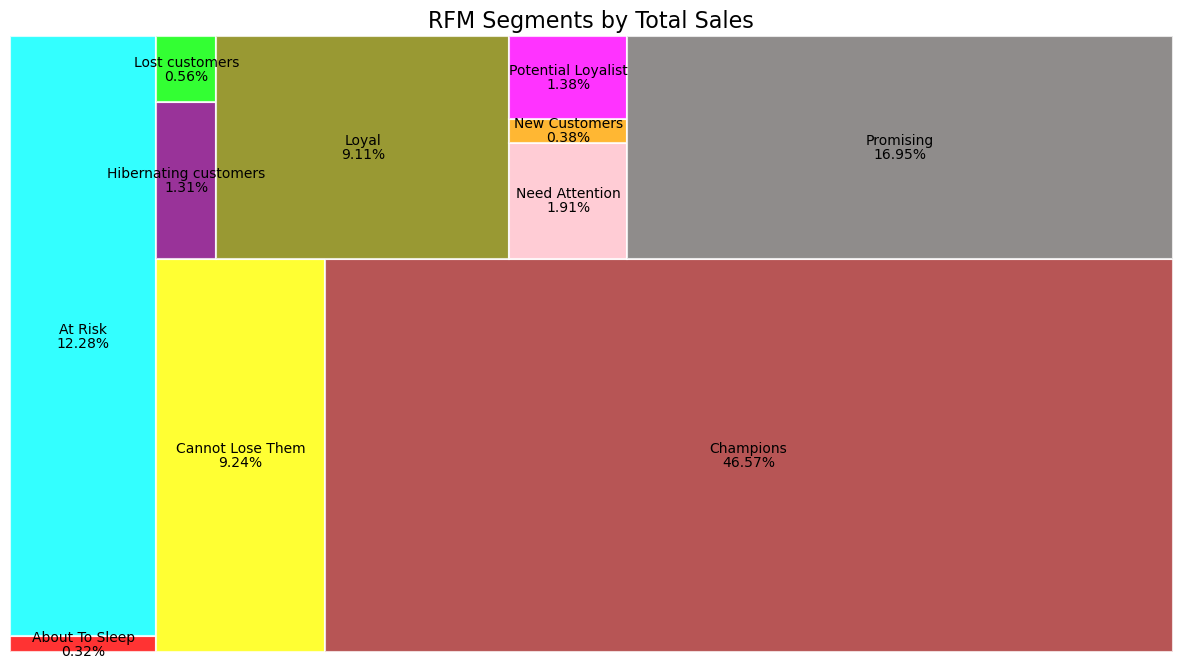

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Calculate total revenue for each segment
grp = merged_df.groupby('Segment')['Monetary'].sum().reset_index(name='Total_Sales')

# Calculate the percentage of each segment
total_sales = grp['Total_Sales'].sum()
grp['Sales_share'] = grp['Total_Sales'] / total_sales

# print()
print("The shape of our dataset after grouping is: ", grp.shape)
display(grp.head())

# Colors for each segment
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#00FF00', '#808000', '#FFC0CB', '#FFA500', '#FF00FF', '#736F6E']

# figure and axes
fig, ax = plt.subplots(1, figsize=(15, 8))

#Treemap
squarify.plot(
    sizes=grp['Total_Sales'],  # Kích thước của từng ô
    label=grp['Segment'],  # Nhãn của từng ô
    value=[f'{x*100:.2f}%' for x in grp['Sales_share']],  # Giá trị hiển thị trên từng ô
    alpha=.8,
    color=colors,
    bar_kwargs=dict(linewidth=1.5, edgecolor="white")
)

plt.title('RFM Segments by Total Sales', fontsize=16)
plt.axis('off')
plt.show()


###  Insights from the RFM Segments by Total Sales Diagram:

#### Overall Customer Distribution:

##### The diagram shows the distribution of customers across different RFM segments based on their total sales.
##### The majority of customers (67.28%) fall into the "At Risk" and "Need Attention" segments, indicating that they are at risk of churn and require targeted marketing efforts.
##### The "Loyal" and "Promising" segments represent a smaller but valuable customer base (11.49%) that should be nurtured and retained.
##### The "Champions" segment (46.57%) comprises the most valuable customers who generate a significant portion of total sales.


### Recomendation

In [64]:
import pandas as pd

data = {
    "Segment": ["Champions", "Promising", "At Risk", "Cannot Lose Them", "Loyal", "Need Attention", 
                "Hibernating Customers", "Potential Loyalist", "Lost Customers", "New Customers", "About To Sleep"],
    "Characteristics": [
        "Mua hàng thường xuyên, giá trị đơn hàng cao, tương tác tốt với công ty.",
        "Khách hàng mới hoặc quay lại sau một thời gian không mua hàng, có tiềm năng trở thành Champions.",
        "Đã từng mua hàng nhiều nhưng gần đây không còn mua hàng thường xuyên.",
        "Khách hàng trung thành, có giá trị cao, nhưng có nguy cơ rời bỏ.",
        "Mua hàng thường xuyên, có mức độ trung thành cao.",
        "Mua hàng không thường xuyên, có thể có vấn đề với dịch vụ hoặc sản phẩm.",
        "Khách hàng ít tương tác, có thể không còn quan tâm đến sản phẩm/dịch vụ.",
        "Khách hàng mới hoặc có tiềm năng trở thành trung thành.",
        "Khách hàng đã rời bỏ công ty.",
        "Khách hàng mới lần đầu mua hàng.",
        "Khách hàng sắp ngừng tương tác với công ty."
    ],
    "Recommendations": [
        "Duy trì và củng cố mối quan hệ bằng cách gửi các ưu đãi đặc biệt.\nCung cấp chương trình khách hàng thân thiết hoặc VIP.\nTặng quà hoặc dịch vụ miễn phí để tăng sự hài lòng.",
        "Tăng cường chăm sóc khách hàng bằng cách gửi các khuyến mãi hấp dẫn.\nTạo các chương trình khuyến mãi hoặc ưu đãi đặc biệt để khuyến khích mua hàng thường xuyên.\nXây dựng mối quan hệ tốt hơn qua dịch vụ khách hàng tuyệt vời.",
        "Gửi email hoặc tin nhắn khuyến khích họ quay lại mua hàng.\nCung cấp các ưu đãi hoặc giảm giá đặc biệt để khuyến khích mua hàng.\nTìm hiểu lý do tại sao họ không còn mua hàng và cải thiện các điểm yếu.",
        "Gửi lời cảm ơn và đánh giá cao sự trung thành của họ.\nCung cấp các ưu đãi đặc biệt để giữ họ tiếp tục mua hàng.\nLiên tục kiểm tra mức độ hài lòng và điều chỉnh dịch vụ khi cần thiết.",
        "Thưởng cho sự trung thành của họ bằng các chương trình khuyến mãi đặc biệt.\nTạo chương trình khách hàng thân thiết để tăng sự gắn bó.\nGửi các sản phẩm hoặc dịch vụ mới để họ cảm thấy được quan tâm.",
        "Liên hệ trực tiếp để tìm hiểu và giải quyết vấn đề họ gặp phải.\nCung cấp dịch vụ khách hàng tốt hơn và nhanh chóng.\nGửi các khuyến mãi hoặc ưu đãi để khuyến khích mua hàng lại.",
        "Gửi các chiến dịch marketing lại để nhắc nhở về sự tồn tại của công ty.\nCung cấp các ưu đãi đặc biệt để khuyến khích họ quay lại.\nTìm hiểu lý do tại sao họ ít tương tác và cải thiện dịch vụ.",
        "Tạo các chương trình khuyến mãi để khuyến khích mua hàng thường xuyên.\nCung cấp dịch vụ khách hàng tuyệt vời để xây dựng mối quan hệ tốt hơn.\nĐánh giá và phân tích hành vi mua hàng để hiểu rõ nhu cầu của họ.",
        "Gửi email hoặc tin nhắn để tìm hiểu lý do tại sao họ rời bỏ.\nCung cấp các ưu đãi để khuyến khích họ quay lại.\nCải thiện dịch vụ và sản phẩm dựa trên phản hồi của họ.",
        "Chào mừng họ bằng một chương trình khuyến mãi đặc biệt.\nHướng dẫn và hỗ trợ họ để họ có trải nghiệm mua sắm tốt nhất.\nGửi các sản phẩm hoặc dịch vụ liên quan để khuyến khích mua hàng tiếp theo.",
        "Gửi các chiến dịch marketing lại để khuyến khích mua hàng.\nCung cấp các ưu đãi đặc biệt để giữ họ tiếp tục tương tác.\nTìm hiểu lý do tại sao họ sắp ngừng tương tác và cải thiện dịch vụ."
    ]
}
df = pd.DataFrame(data)
df


,Segment,Characteristics,Recommendations
0,Champions,"Mua hàng thường xuyên, giá trị đơn hàng cao, t...",Duy trì và củng cố mối quan hệ bằng cách gửi c...
1,Promising,Khách hàng mới hoặc quay lại sau một thời gian...,Tăng cường chăm sóc khách hàng bằng cách gửi c...
2,At Risk,Đã từng mua hàng nhiều nhưng gần đây không còn...,Gửi email hoặc tin nhắn khuyến khích họ quay l...
3,Cannot Lose Them,"Khách hàng trung thành, có giá trị cao, nhưng ...",Gửi lời cảm ơn và đánh giá cao sự trung thành ...
4,Loyal,"Mua hàng thường xuyên, có mức độ trung thành cao.",Thưởng cho sự trung thành của họ bằng các chươ...
5,Need Attention,"Mua hàng không thường xuyên, có thể có vấn đề ...",Liên hệ trực tiếp để tìm hiểu và giải quyết vấ...
6,Hibernating Customers,"Khách hàng ít tương tác, có thể không còn quan...",Gửi các chiến dịch marketing lại để nhắc nhở v...
7,Potential Loyalist,Khách hàng mới hoặc có tiềm năng trở thành tru...,Tạo các chương trình khuyến mãi để khuyến khíc...
8,Lost Customers,Khách hàng đã rời bỏ công ty.,Gửi email hoặc tin nhắn để tìm hiểu lý do tại ...
9,New Customers,Khách hàng mới lần đầu mua hàng.,Chào mừng họ bằng một chương trình khuyến mãi ...
